# Solution 05 - Linear regression with categorical variables and polynomial features

We first import required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd


## Data
Given are (fictitious) employee data of a large company. Each row in this DataFrame corresponds to one employee. The following features are stored:
* ID: The personnel number
* YearsInCompany: For how many years has the person been working in the company?
* Department: In which department does the person work? Development, sales or administration?
* Performance: A measure that quantifies the performance of the employee (between 0 and 100)
* MonthsInCompany: How many months the person has been with the company
* Salary: The person's annual salary in EUR

We first read the data and display an extract.

In [26]:
df = pd.read_csv("Data/salary.csv")
df

,ID,YearsInCompany,Department,Performance,MonthsInCompany,Salary
0,6252,7.6,Sales,63.0,91.0,90822.0
1,4684,0.1,Sales,70.0,1.0,90619.0
2,1731,4.6,Sales,52.0,55.0,83041.0
3,4742,5.9,Development,54.0,70.0,71367.0
4,4521,8.7,Sales,85.0,104.0,118978.0
...,...,...,...,...,...,...
988,3921,1.5,Administration,77.0,18.0,48407.0
989,6685,12.0,Development,67.0,144.0,92007.0
990,3194,0.5,Sales,33.0,6.0,57029.0
991,1941,0.3,Administration,54.0,3.0,40590.0


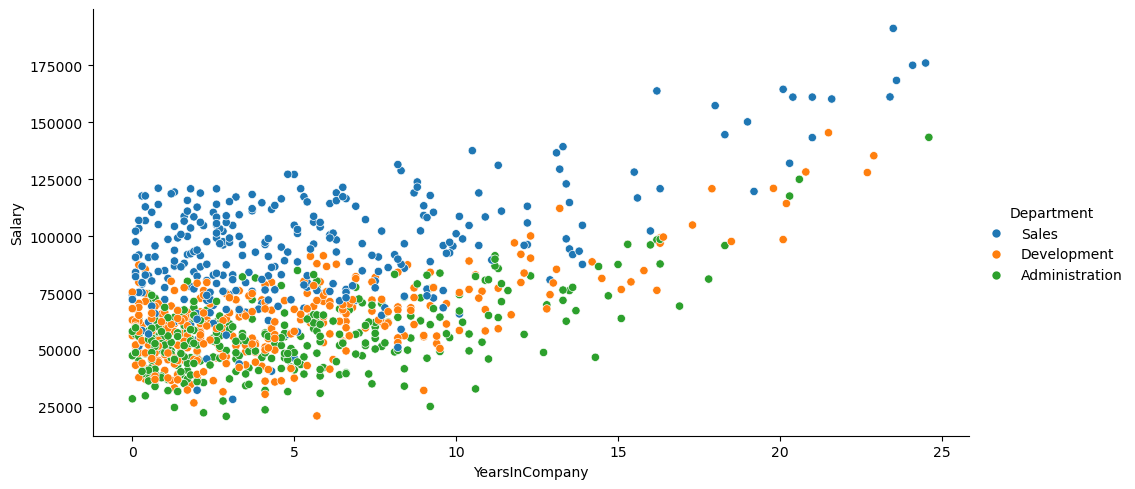

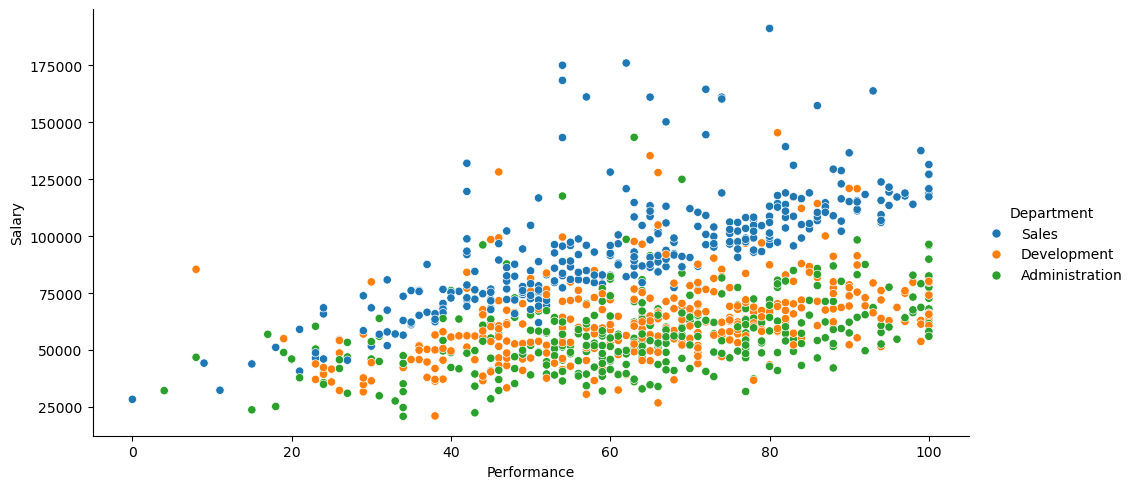

In [27]:
sns.relplot(data=df,x="YearsInCompany", y="Salary", hue="Department", aspect=2)
sns.relplot(data=df,x="Performance", y="Salary", hue="Department", aspect=2)

## Tasks 

In this exercise, you will train and evaluate various regression models that predict the annual salary (`salary`) for an employee.

### Task 1
Train a multiple linear regression on the features `YearsInCompany`, `Department` and `Performance`. Proceed as follows:
1. Convert the categorical feature `Department` to a numeric feature using one-hot encoding. The easiest way to do this is to convert the DataFrame using Pandas function `get_dummies`, see https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html. Which columns are automatically generated?
2. Select all features (columns) of the DataFrame with which the model should be trained. 
3. Divide the data into test and training data (70% training data, 30% test data). 
4. Train the model. 
5. Evaluate the model by calculating the $R^2$ value on the training and test data.

In [28]:
df1 = pd.get_dummies(df, drop_first=True)
df1

,ID,YearsInCompany,Performance,MonthsInCompany,Salary,Department_Development,Department_Sales
0,6252,7.6,63.0,91.0,90822.0,False,True
1,4684,0.1,70.0,1.0,90619.0,False,True
2,1731,4.6,52.0,55.0,83041.0,False,True
3,4742,5.9,54.0,70.0,71367.0,True,False
4,4521,8.7,85.0,104.0,118978.0,False,True
...,...,...,...,...,...,...,...
988,3921,1.5,77.0,18.0,48407.0,False,False
989,6685,12.0,67.0,144.0,92007.0,True,False
990,3194,0.5,33.0,6.0,57029.0,False,True
991,1941,0.3,54.0,3.0,40590.0,False,False


In [29]:
features = ["YearsInCompany", "Department_Sales", "Department_Development",  "Performance"]
X1 = df1[features]
y1 = df1["Salary"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
m1 = linear_model.LinearRegression()
m1.fit(X1_train, y1_train)
y1_pred = m1.predict(X1_train)
print(f"R^2 Training data: {metrics.r2_score(y1_train, y1_pred)}.")
print(f"RMSE Training data: {metrics.root_mean_squared_error(y1_train, y1_pred)}.")

# Metrics on the test data
y1_pred = m1.predict(X1_test)
print(f"R^2 Test data: {metrics.r2_score(y1_test, y1_pred)}.")
print(f"RMSE Test data: {metrics.root_mean_squared_error(y1_test, y1_pred)}.")

print(m1.intercept_)
print(m1.coef_)

R^2 Training data: 0.8132605032162892.
RMSE Training data: 11394.519975240944.
R^2 Test data: 0.7757480692236357.
RMSE Test data: 11184.211956046842.
8868.2391822871
[ 2710.40409269 36694.3670703   5977.78086268   547.68715472]


### Task 2
Train a polynomial regression with a quadratic term for the feature `YearsInCompany`. Proceed as follows:
1. Create a column in the DataFrame that contains the squared values of `YearsInCompany`, e.g. `YearsInCompanySquared`. 
2. Now follow Steps 1 to 5 from Task 1.

In [30]:
df1["YearsInCompanySquared"] = df1["YearsInCompany"]*df1["YearsInCompany"]
features = ["YearsInCompany", "Performance", "Department_Development", "Department_Sales", "YearsInCompanySquared"]

X2 = df1[features]
y2 = df1["Salary"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
m2 = linear_model.LinearRegression()
m2.fit(X2_train, y2_train)
y2_pred = m2.predict(X2_train)
print(f"R^2 Training data: {metrics.r2_score(y2_train, y2_pred)}.")
print(f"RMSE Training data: {metrics.root_mean_squared_error(y2_train, y2_pred)}.")

# Metrics on the test data
y2_pred = m2.predict(X2_test)
print(f"R^2 Test data: {metrics.r2_score(y2_test, y2_pred)}.")
print(f"RMSE Test data: {metrics.root_mean_squared_error(y2_test, y2_pred)}.")

R^2 Training data: 0.8556009628996948.
RMSE Training data: 10019.82394178737.
R^2 Test data: 0.8132384104388066.
RMSE Test data: 10206.599514319387.


### Task 3
Train a model that additionally contains an interaction term between `Department_Sales` and `Performance`. Proceed as follows:
1. Create a column in the DataFrame that contains the product of `Department_Sales` and `Performance`.
2. Now follow Steps 1 to 5 from Task 1.
3. Look again at all the models from Tasks 1 - 3, which model explains the data best? What conclusions can you draw regarding the salaries of the company?

In [31]:
df1["YearsInCompanySquared"] = df1["YearsInCompany"]*df1["YearsInCompany"]
df1["SalesPerformance"] = df1["Department_Sales"]*df1["Performance"]
features = ["YearsInCompany", "Performance", "Department_Development", "Department_Sales", "YearsInCompanySquared", "SalesPerformance"]

X3 = df1[features]
y3 = df1["Salary"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
m3 = linear_model.LinearRegression()
m3.fit(X3_train, y3_train)
y3_pred = m3.predict(X3_train)
print(f"R^2 Training data: {metrics.r2_score(y3_train, y3_pred)}.")
print(f"RMSE Training data: {metrics.root_mean_squared_error(y3_train, y3_pred)}.")

# Metrics on the test data
y3_pred = m3.predict(X3_test)
print(f"R^2 Test data: {metrics.r2_score(y3_test, y3_pred)}.")
print(f"RMSE Test data: {metrics.root_mean_squared_error(y3_test, y3_pred)}.")

R^2 Training data: 0.8873686217422061.
RMSE Training data: 8849.273977877905.
R^2 Test data: 0.8710399420164727.
RMSE Test data: 8481.348393315966.


### Bonus
Write down the corresponding model function $f(x)$ for each of the models. For this purpose, output the coefficients of the trained models from the previous tasks (with `m.coef_` or `m.intercept_` you get the vector $w$ or the value $w_0$).
What do the values say for the concrete example?

In [32]:
print(f"m1 w0 = {m1.intercept_}")
print(f"m1 w = {m1.coef_}")

m1 w0 = 8868.2391822871
m1 w = [ 2710.40409269 36694.3670703   5977.78086268   547.68715472]


In [33]:
print(f"m2 w0 = {m2.intercept_}")
print(f"m2 w = {m2.coef_}")

m2 w0 = 16031.102316325487
m2 w = [ -139.77834562   542.2248255   5829.87844891 36335.48124338
   161.13599176]


In [34]:
print(f"m3 w0 = {m3.intercept_}")
print(f"m3 w = {m3.coef_}")

m3 w0 = 26051.777080073552
m3 w = [-105.28443804  385.30805594 6058.03750324 4226.45026448  157.98513397
  511.48177806]
